<a href="https://colab.research.google.com/github/jess22jess/EDP/blob/main/EDP2_111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solución numérica para Dirichlet, n=1:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Solución numérica para Dirichlet, n=2:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Solución numérica para Dirichlet, n=3:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

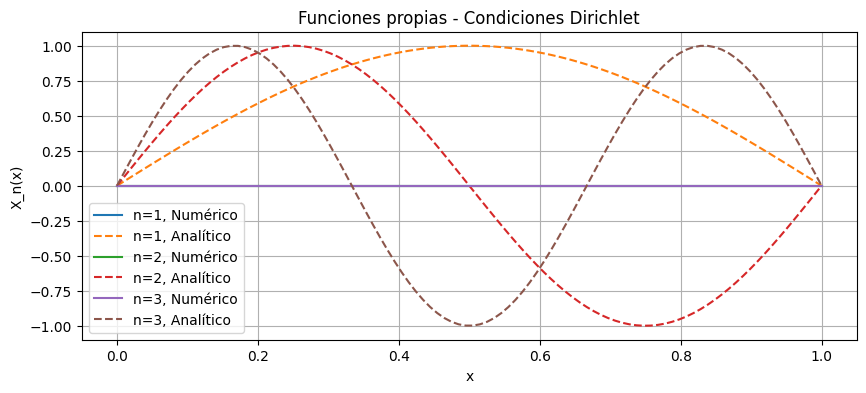

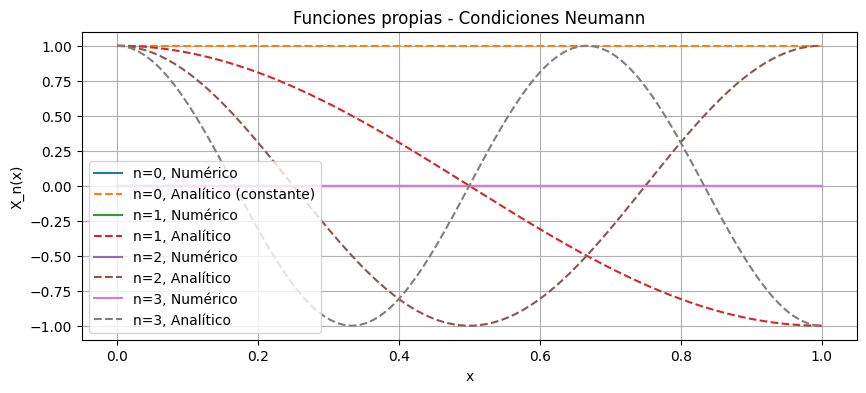

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp


def odes(x, y, k):
    return np.vstack([y[1], -k * y[0]])


def bc_dirichlet(ya, yb):
    return np.array([ya[0], yb[0]])

def bc_neumann(ya, yb):
    return np.array([ya[1], yb[1]])

x_vals = np.linspace(0, 1, 100)


n_values = [1, 2, 3]
dirichlet_solutions = []

for n in n_values:
    k = (n * np.pi) ** 2
    y_init = np.zeros((2, x_vals.size))
    sol = solve_bvp(lambda x, y: odes(x, y, k), bc_dirichlet, x_vals, y_init)
    dirichlet_solutions.append(sol.sol(x_vals)[0])
    print(f"Solución numérica para Dirichlet, n={n}:")
    print(sol.sol(x_vals)[0])


n_values_neumann = [0, 1, 2, 3]
neumann_solutions = []

for n in n_values_neumann:
    k = (n * np.pi) ** 2
    y_init = np.zeros((2, x_vals.size)) + 1e-5
    sol = solve_bvp(lambda x, y: odes(x, y, k), bc_neumann, x_vals, y_init)
    neumann_solutions.append(sol.sol(x_vals)[0])
    print(f"Solución numérica para Neumann, n={n}:")
    print(sol.sol(x_vals)[0])

plt.figure(figsize=(10, 4))
for i, sol in enumerate(dirichlet_solutions):
    n = n_values[i]
    plt.plot(x_vals, sol, label=f"n={n}, Numérico")
    plt.plot(x_vals, np.sin(n * np.pi * x_vals), '--', label=f"n={n}, Analítico")
plt.title("Funciones propias - Condiciones Dirichlet")
plt.xlabel("x")
plt.ylabel("X_n(x)")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 4))
for i, sol in enumerate(neumann_solutions):
    n = n_values_neumann[i]
    plt.plot(x_vals, sol, label=f"n={n}, Numérico")
    if n == 0:
        plt.plot(x_vals, np.ones_like(x_vals), '--', label=f"n=0, Analítico (constante)")
    else:
        plt.plot(x_vals, np.cos(n * np.pi * x_vals), '--', label=f"n={n}, Analítico")
plt.title("Funciones propias - Condiciones Neumann")
plt.xlabel("x")
plt.ylabel("X_n(x)")
plt.legend()
plt.grid(True)
plt.show()
